In [135]:
# Espacio de trabajo
import collections
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber', 'venezolano', 'venezolanos', 'venezolana', 'venezolanas', 'veneco', 'veneca', 'venecos', 'venecas','colombia','colombianos'])
%matplotlib inline
import sys
sys.path.append('../')
import funciones as fn
import re
import scipy
import numpy as np
import math
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
# Read input file, note the encoding is specified here 
# It may be different in your text file
df = pd.read_excel('Afiliacion_migrantes.xlsx')
#Tomamos la primera fila como nombre de las columnas
column_names=df.columns.to_list()
print(column_names)
#Cambiamos los espacios por _
column_names=[re.sub('\\s', '_', x) for x in column_names]
#Renombramos las columnas
df.columns=column_names
#Eliminamos la fila que tomamos como nombre de las columnas
df=df.iloc[1:,:]
#Hacemos un reset al index
df=df.reset_index(drop=True)
df

['Unnamed: 0', 'Query Id', 'Query Name', 'Date', 'Title', 'Snippet', 'Full Text', 'Url', 'Domain', 'Sentiment', 'Emotion', 'Page Type', 'Language', 'Country Code', 'Continent Code', 'Continent', 'Country', 'Region Code', 'Region', 'City Code', 'Account Type', 'Assignment', 'Author', 'Avatar', 'Category Details', 'Checked', 'City', 'Display URLs', 'Expanded URLs', 'Facebook Author ID', 'Facebook Comments', 'Facebook Likes', 'Facebook Role', 'Facebook Shares', 'Facebook Subtype', 'Full Name', 'Gender', 'Hashtags', 'Impact', 'Impressions', 'Instagram Comments', 'Instagram Followers', 'Instagram Following', 'Instagram Likes', 'Instagram Posts', 'Interest', 'Last Assignment Date', 'Latitude', 'Location Name', 'Longitude', 'Media Filter', 'Media URLs', 'Mentioned Authors', 'Priority', 'Professions', 'Resource Id', 'Short URLs', 'Starred', 'Status', 'Subtype', 'Tags', 'Thread Author', 'Thread Created Date', 'Thread Entry Type', 'Thread Id', 'Thread URL', 'Total Monthly Visitors', 'Twitter Aut

Unnamed:_0    Query_Id                       Query_Name  \
0              2  2000474926  [Q] Barómetro migrante Colombia   
1              3  2000474926  [Q] Barómetro migrante Colombia   
2              4  2000474926  [Q] Barómetro migrante Colombia   
3              5  2000474926  [Q] Barómetro migrante Colombia   
4              6  2000474926  [Q] Barómetro migrante Colombia   
...          ...         ...                              ...   
1357        1359  2000474926  [Q] Barómetro migrante Colombia   
1358        1360  2000474926  [Q] Barómetro migrante Colombia   
1359        1361  2000474926  [Q] Barómetro migrante Colombia   
1360        1362  2000474926  [Q] Barómetro migrante Colombia   
1361        1363  2000474926  [Q] Barómetro migrante Colombia   

                         Date  \
0     2021-04-12 18:05:01.000   
1     2021-04-12 03:17:11.000   
2     2021-04-12 00:47:50.000   
3     2021-04-11 22:04:27.000   
4     2021-04-11 21:00:39.000   
...                       ...   
1357  2020-12-21 18:18:03.000   
1358  2020-12-21 16:53:56.000   
1359  2020-12-21 16:19:38.000   
1360  2020-12-21 16:17:28.000   
1361  2020-12-20 12:03:59.000   

                                                  Title  \
0     RT @edgarzambranoad #12Abr | Acción Democrátic...   
1     Importante donación de equipos al Hospital Reg...   
2     Importante donación de equipos al Hospital Reg...   
3     Importante donación de equipos al Hospital Reg...   
4     Importante donación de equipos al Hospital Reg...   
...                                                 ...   
1357  RT @anamartj Un buen inicio de semana... recié...   
1358  Cabe mencionar que legalizar la estancia de lo...   
1359  @agaviriau ¿Y producir otra migración masiva d...   
1360  @KatherineM_G Supongo que constitucionalmente ...   
1361  Conoce la historia de Genesis, una nacional ve...   

                                                Snippet  \
0     RT @edgarzambranoad #12Abr | Acción Democrátic...   
1     Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
2     Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
3     Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
4     La asesora de Despacho y Coordinadora de la Of...   
...                                                 ...   
1357  RT @anamartj Un buen inicio de semana... recié...   
1358  Cabe mencionar que legalizar la estancia de lo...   
1359  @agaviriau ¿Y producir otra migración masiva d...   
1360  @KatherineM_G Supongo que constitucionalmente ...   
1361  Conoce la historia de Genesis, una nacional ve...   

                                              Full_Text  \
0     RT @edgarzambranoad #12Abr | Acción Democrátic...   
1     Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
2     Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
3     Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
4     La asesora de Despacho y Coordinadora de la Of...   
...                                                 ...   
1357  RT @anamartj Un buen inicio de semana... recié...   
1358  Cabe mencionar que legalizar la estancia de lo...   
1359  @agaviriau ¿Y producir otra migración masiva d...   
1360  @KatherineM_G Supongo que constitucionalmente ...   
1361  Conoce la historia de Genesis, una nacional ve...   

                                                    Url           Domain  \
0     http://twitter.com/MedicenJossema1/statuses/13...      twitter.com   
1     http://hsbnoticias.com/noticias/politica/impor...  hsbnoticias.com   
2     https://cucuta.extra.com.co/noticias/politica/...     extra.com.co   
3     http://pasto.extra.com.co/noticias/politica/im...     extra.com.co   
4     https://hsbnoticias.com/noticias/politica/impo...  hsbnoticias.com   
...                                                 ...              ...   
1357  http://twitter.com/calichemon/statuses/1341085...      twitter.com   
1358  http://twitter.com/angelik110/statuses/1341064...      twitter.com   
1359  http://twit

In [137]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
df['Clean_Text']=df['Snippet'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
df['Clean_Text']=df['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
df['Clean_Text']=df['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
df['Clean_Text']=df['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
df['Clean_Text']=df['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
df['Clean_Text']=df['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
df['Clean_Text']=df['Clean_Text'].replace('"', '', regex=True)
df['Clean_Text']=df['Clean_Text'].replace('|', '', regex=True)
df['Clean_Text']=df['Clean_Text'].replace('RT', '', regex=True)
df=df.reset_index(drop=True)
df=df.reset_index()
df = df.astype({"Clean_Text": str})
df.head(11)

index  Unnamed:_0    Query_Id                       Query_Name  \
0       0           2  2000474926  [Q] Barómetro migrante Colombia   
1       1           3  2000474926  [Q] Barómetro migrante Colombia   
2       2           4  2000474926  [Q] Barómetro migrante Colombia   
3       3           5  2000474926  [Q] Barómetro migrante Colombia   
4       4           6  2000474926  [Q] Barómetro migrante Colombia   
5       5           7  2000474926  [Q] Barómetro migrante Colombia   
6       6           8  2000474926  [Q] Barómetro migrante Colombia   
7       7           9  2000474926  [Q] Barómetro migrante Colombia   
8       8          10  2000474926  [Q] Barómetro migrante Colombia   
9       9          11  2000474926  [Q] Barómetro migrante Colombia   
10     10          12  2000474926  [Q] Barómetro migrante Colombia   

                       Date  \
0   2021-04-12 18:05:01.000   
1   2021-04-12 03:17:11.000   
2   2021-04-12 00:47:50.000   
3   2021-04-11 22:04:27.000   
4   2021-04-11 21:00:39.000   
5   2021-04-11 20:59:44.000   
6   2021-04-11 20:59:38.000   
7   2021-04-11 20:59:25.000   
8   2021-04-11 20:57:33.000   
9   2021-04-11 18:36:26.000   
10  2021-04-11 16:18:26.000   

                                                Title  \
0   RT @edgarzambranoad #12Abr | Acción Democrátic...   
1   Importante donación de equipos al Hospital Reg...   
2   Importante donación de equipos al Hospital Reg...   
3   Importante donación de equipos al Hospital Reg...   
4   Importante donación de equipos al Hospital Reg...   
5   Importante donación de equipos al Hospital Reg...   
6                                        Chiquinquirá   
7   Importante donación de equipos al Hospital Reg...   
8   Para salir corriendo de ahí: Posible fantasma ...   
9   Deuda por atención a migrantes en Norte de San...   
10  Insatisfacción sexual: otra de las deudas que ...   

                                              Snippet  \
0   RT @edgarzambranoad #12Abr | Acción Democrátic...   
1   Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
2   Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
3   Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
4   La asesora de Despacho y Coordinadora de la Of...   
5   La asesora de Despacho y Coordinadora de la Of...   
6   Importante donación de equipos al Hospital Reg...   
7   La asesora de Despacho y Coordinadora de la Of...   
8   La asesora de Despacho y Coordinadora de la Of...   
9   Las autoridades de salud en Norte de Santander...   
10  Encuesta Profamilia sobre salud sexual durante...   

                                            Full_Text  \
0   RT @edgarzambranoad #12Abr | Acción Democrátic...   
1   Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
2   Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
3   Domingo, Abril 11, 2021 - 15:55 La Secretaría ...   
4   La asesora de Despacho y Coordinadora de la Of...   
5   La asesora de Despacho y Coordinadora de la Of...   
6   Importante donación de equipos al Hospital Reg...   
7   La asesora de Despacho y Coordinadora de la Of...   
8   La asesora de Despacho y Coordinadora de la Of...   
9   Las autoridades de salud en Norte de Santander...   
10  Encuesta Profamilia sobre salud sexual durante...   

                                                  Url                 Domain  \
0   http://twitter.com/MedicenJossema1/statuses/13...            twitter.com   
1   http://hsbnoticias.com/noticias/politica/impor...        hsbnoticias.com   
2   https://cucuta.extra.com.co/noticias/politica/...           extra.com.co   
3   http://pasto.extra.com.co/noticias/politica/im...           extra.com.co   
4   https://hsbnoticias.com/noticias/politica/impo...        hsbnoticias.com   
5   https://boyaca.extra.com.co/noticias/politica/...           extra.com.co   
6   https://chiquinquira.extra.com.co/noticias/pol...           extra.com.co   
7   https://diariodelsur.com.co/noticias/politica/...    diariodelsur.com.co   
8   https://dia

In [138]:
snippets = df['Clean_Text']

In [139]:
wordcount = {}
for texts in snippets:
    texts = texts.lower().split(' ')
    for word in texts:
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in spanish_stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

In [140]:
# Print most common word
n_print = int(input("De que tamaño queremos el diccionario: "))
print("\nOK. Las {} palabras más populares son:\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

De que tamaño queremos el diccionario: 101

OK. Las 101 palabras más populares son:

 :  1167
salud :  1060
sistema :  477
educación :  392
migrantes :  291
empleo :  218
acceso :  213
tan :  208
duque :  201
presidente :  197
ahora :  189
calidad :  176
país :  171
buena :  162
venezuela :  160
hacinamiento :  159
gobierno :  157
bella :  154
remuneración :  154
accesible :  154
estupendo :  154
pereza :  154
cárceles :  154
vacías :  154
presos :  154
@lamiadolcinea :  153
servicios :  118
millones :  117
si :  115
@eclides3 :  115
nacional :  112
protección :  112
temporal :  112
mejor :  108
@ivanduque :  104
tributaria :  94
reforma :  93
atención :  92
bajos :  91
población :  89
otorgará :  89
ciudadanía :  88
prerrogativas :  88
estratos :  88
clavaba :  88
nefasta :  88
covid-19 :  84
internacional :  82
médicos :  81
refugiados :  78
iván :  76
trabajo :  74
personas :  74
hoy :  70
estatus :  70
estatuto :  67
situación :  61
permitirá :  61
17 :  59
vacunación :  59
2021 : 

<AxesSubplot:xlabel='Word'>

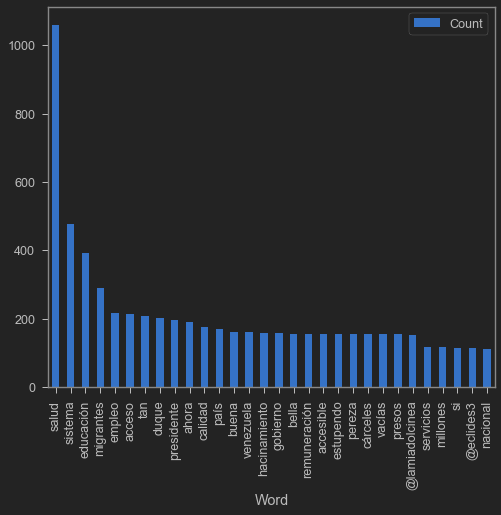

In [146]:
lst = word_counter.most_common(n_print)
if lst[0][0] == '':
    lst = lst[1:]
top = pd.DataFrame(lst[:30], columns = ['Word', 'Count'])
top.plot.bar(x='Word',y='Count')

In [142]:
print(df.columns.to_list())

['index', 'Unnamed:_0', 'Query_Id', 'Query_Name', 'Date', 'Title', 'Snippet', 'Full_Text', 'Url', 'Domain', 'Sentiment', 'Emotion', 'Page_Type', 'Language', 'Country_Code', 'Continent_Code', 'Continent', 'Country', 'Region_Code', 'Region', 'City_Code', 'Account_Type', 'Assignment', 'Author', 'Avatar', 'Category_Details', 'Checked', 'City', 'Display_URLs', 'Expanded_URLs', 'Facebook_Author_ID', 'Facebook_Comments', 'Facebook_Likes', 'Facebook_Role', 'Facebook_Shares', 'Facebook_Subtype', 'Full_Name', 'Gender', 'Hashtags', 'Impact', 'Impressions', 'Instagram_Comments', 'Instagram_Followers', 'Instagram_Following', 'Instagram_Likes', 'Instagram_Posts', 'Interest', 'Last_Assignment_Date', 'Latitude', 'Location_Name', 'Longitude', 'Media_Filter', 'Media_URLs', 'Mentioned_Authors', 'Priority', 'Professions', 'Resource_Id', 'Short_URLs', 'Starred', 'Status', 'Subtype', 'Tags', 'Thread_Author', 'Thread_Created_Date', 'Thread_Entry_Type', 'Thread_Id', 'Thread_URL', 'Total_Monthly_Visitors', 'Tw

In [143]:
def search_palabra(df, tupla):
    """
    Retorna una pequeña DataFrame en donde todas las filas tienen almenos una mención de una palabra de interés
    """
    data = list()
    diccionario = dict()
    palabras = list()
    count = list()
    for l,j in tupla:
        palabras.append(l)
        count.append(j)
    i = 0
    for palabra in palabras:
        contiene = df[df['Clean_Text'].str.contains(palabra)]
        mean_reach = contiene['Reach_(new)'].mean()
        seguidores_promedio = contiene['Twitter_Followers'].mean()
        seguidores_max = contiene['Twitter_Followers'].max()
        impacto_promedio = contiene['Impact'].mean()
        impresiones_promedio = contiene['Impressions'].mean()
        if math.isnan(mean_reach):
            main_cat = ''
            main_sentiment = ''
        else:
            main_cat = contiene.Categoría_Barometro_v3.mode()[0]
            main_sentiment = contiene.Sentiment.mode()[0]
        diccionario = {'Palabra': palabra, 'Alcance promedio': mean_reach, 'Categoría principal': main_cat, 'Sentimiento principal': main_sentiment
                       ,'Veces usada': count[i], 'Seguidores promedio': seguidores_promedio, 'Seguidores máximo': seguidores_max, 'Impacto promedio': impacto_promedio
                       ,'Impresiones promedio': impresiones_promedio}
        i += 1
        data.append(diccionario)
    return pd.DataFrame(data)
prueba = search_palabra(df, lst)
prueba

Palabra  Alcance promedio  \
0            salud       2801.007353   
1          sistema       1711.099099   
2        educación       3009.406103   
3        migrantes       3000.819005   
4           empleo       3211.986301   
..             ...               ...   
95           según       1263.047619   
96         acceder       2608.810811   
97  regularización       4963.322581   
98     acompañamos          0.000000   
99    @onucolombia       2968.918919   

                                  Categoría principal Sentimiento principal  \
0                                               Salud               neutral   
1   Educación , Salud , Seguridad , Trabajo , Vivi...              positive   
2                                   Educación , Salud              positive   
3                                     Salud , Trabajo               neutral   
4                         Educación , Salud , Trabajo               neutral   
..                                                ...                   ...   
95  Educación , Integración, Salud , Trabajo , Viv...               neutral   
96                       Integración, Salud , Trabajo              negative   
97           Educación , Integración, Salud , Trabajo              negative   
98                                 Integración, Salud               neutral   
99                                    Salud , Trabajo               neutral   

    Veces usada  Seguidores promedio  Seguidores máximo  Impacto promedio  \
0          1060         46089.010352          8986931.0          9.438761   
1           477         18765.555804          4137227.0          8.748649   
2           392         64608.351288          8986931.0          7.083333   
3           291         43839.869748          8986931.0         19.211765   
4           218         24331.465753           758358.0         10.998630   
..          ...                  ...                ...               ...   
95           37           520.318182            10248.0         32.471429   
96           37          2782.315789            41844.0         18.316216   
97           37         56588.687500          1339210.0         28.432258   
98           37           466.000000              466.0          0.000000   
99           37          2505.945946            43899.0          5.913514   

    Impresiones promedio  
0           49962.017598  
1           19617.997768  
2           68021.953162  
3           51006.420168  
4           35407.342466  
..                   ...  
95            520.318182  
96           3271.763158  
97          70561.187500  
98            466.000000  
99          29668.459459  

[100 rows x 9 columns]

In [144]:
prueba.to_excel('Diccionario.xlsx')